In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Setting up image pipeline


In [ ]:
# download dataset
IMAGES_DIR = '/content/data'
try:
  os.makedirs(IMAGES_DIR)
except:
  print('Already exists')

tf.keras.utils.get_file("MelanomaDetection.zip","https://lp-prod-resources.s3.amazonaws.com/278/45149/2021-02-19-19-47-43/MelanomaDetection.zip", extract=True)

Already exists


'/root/.keras/datasets/MelanomaDetection.zip'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torchvision.io import read_image
import torchvision.transforms as T
import cv2
from keras.preprocessing.image import  img_to_array
from glob import glob
import os
from tqdm.notebook import tqdm

In [ ]:
!mv ~/.keras/datasets/MelanomaDetection/ ./data 

mv: cannot move '/root/.keras/datasets/MelanomaDetection/' to './data/MelanomaDetection': Directory not empty


In [ ]:
class UnlabeledImagesDataSet(torch.utils.data.Dataset):
  def __init__(self, dir_path, transform=None):
      super(UnlabeledImagesDataSet, self).__init__()
      self.path = dir_path
      self.transform = transform     
      self.files = glob(os.path.join(self.path,'*.jpg'), recursive=True)  
  def __len__(self):
    return len(self.files)

  def __getitem__(self,i):
    img_path =self.files[i]
    image = read_image(img_path)   
    return (image,0)


In [ ]:
class LabeledImagesDataSet(torch.utils.data.Dataset):
  def __init__(self, dir_path, transform=None):
      super(LabeledImagesDataSet, self).__init__()
      self.path = dir_path
      self.transform = transform
      self.data = []    
      self.labels = []
      self.files = glob(os.path.join(self.path,'*.jpg'), recursive=True)    
  def __len__(self):
    return len(self.files)

  def __getitem__(self,i):
        img_path =self.files[i]
        image = read_image(img_path)
        label = 0
        if "_1.jpg" in img_path:
          label = 1        
        return (image,label)

In [ ]:
data_folder = "./data/MelanomaDetection"
labeledDS = LabeledImagesDataSet(os.path.join(data_folder, 'labeled'))

In [ ]:
dataloader = DataLoader(labeledDS, batch_size=4,
                        shuffle=True, num_workers=0)

In [ ]:
unlabeledDS = UnlabeledImagesDataSet(os.path.join(data_folder,'unlabeled'))

In [ ]:
unlabeledDataLoader = DataLoader(unlabeledDS, batch_size=4, shuffle=True, num_workers=0)

In [ ]:
def showBatch(dl):
  fig,ax = plt.subplots(2,2)
  for i_batch, sample_batched in enumerate(dl):  
      for ix, sample in enumerate(sample_batched):   
        print(sample.shape)   
        img = T.ToPILImage()(sample[0])
        ax[0,0].imshow(img)
        img = T.ToPILImage()(sample[1])
        ax[0,1].imshow(img)
        img = T.ToPILImage()(sample[2])
        ax[1,0].imshow(img)
        img = T.ToPILImage()(sample[3])
        ax[1,1].imshow(img)
      
        break
      break
  plt.show()    

    

torch.Size([4, 3, 32, 32])


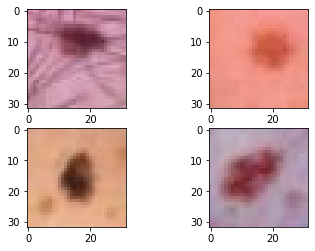

In [ ]:
showBatch(dataloader)

torch.Size([4, 3, 32, 32])


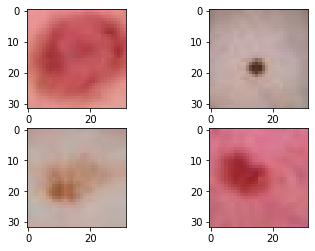

In [ ]:
showBatch(unlabeledDataLoader)

Transformations and pre-preprocessing


*   Normalisation of pixel intensities
*   Convert colour to grayscale
*   Augmentation can include
 *  Rotation
 *  Skewing 

